### Problem Statement

### The client is India's largest fully integrated logistics provider in India. The services provided include express parcel, truckload freight, cross-border and supply chain services with a nation-wide network.

### The goal of this project is to process the data coming out of data engineering pipelines. They key steps include extracting useful features, handling missing and outlier values, encoding and standardization of variables. The data can then be made available to the Data Scientists to generate valuable insights that sets them apart from their competitors. 

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import levene
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
# Importing the dataset and creating a Pandas Dataframe
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181')

In [4]:
# Printing the first 5 rows of first 12 columns of the Dataframe
df.iloc[:,:12].head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0


In [5]:
# Printing the first 5 rows of last 12 columns of the Dataframe
df.iloc[:,12:].head()

,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### 1. Exploratory Data Analysis

### 1.1 Primary Analysis

### 1.2 Non Graphical Analysis

In [6]:
# Shape of the dataset
print(f'# rows: {df.shape[0]}\n# columns: {df.shape[1]}')

# rows: 144867
# columns: 24


In [7]:
# Summary of columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [8]:
# Statistical Summary
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [9]:
df['trip_uuid'].nunique()

14817

### 1. The dataset has 144867 rows and 24 columns
### 2. 12 columns are of object data type, 10 of float data type, 1 each of int and bool datatype
### 3. The column with details of datetime is of object datatype and needs to be converted to datetime type. 
### 4. source_name and destination_name columns have some missing values
### 5. The dataset covers the features of 14817 unique trip ids.
### 6. The statistical analysis gives the following insights
###     6.1 There are outliers in most of the numeric columns

### 1.3 Data Cleaning

In [10]:
# Convert datatypes of relevant columns to datetime
cols_conv=['trip_creation_time','od_start_time','od_end_time']
for i in cols_conv:
    df[i]=pd.to_datetime(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [12]:
# Changing Bangalore to Bengaluru 
df.replace('Bangalore','Bengaluru',inplace=True)

### 1.4 Visual Analysis

<AxesSubplot:xlabel='data', ylabel='trip_uuid'>

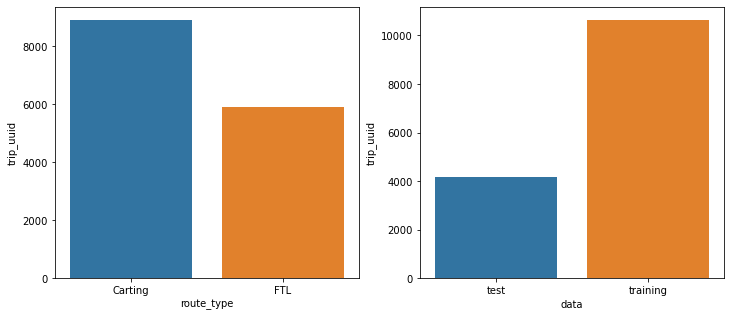

In [13]:
# Count plots of categorical variables
trip_data=df.groupby('route_type')['trip_uuid'].nunique()
trip_data=trip_data.reset_index()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(data=trip_data,x='route_type',y='trip_uuid')

trip_data2=df.groupby('data')['trip_uuid'].nunique()
trip_data2=trip_data2.reset_index()
plt.subplot(1,2,2)
sns.barplot(data=trip_data2,x='data',y='trip_uuid')

### Majority of the data belong to training type.
### Carting route_type has more delivery orders than FTL type

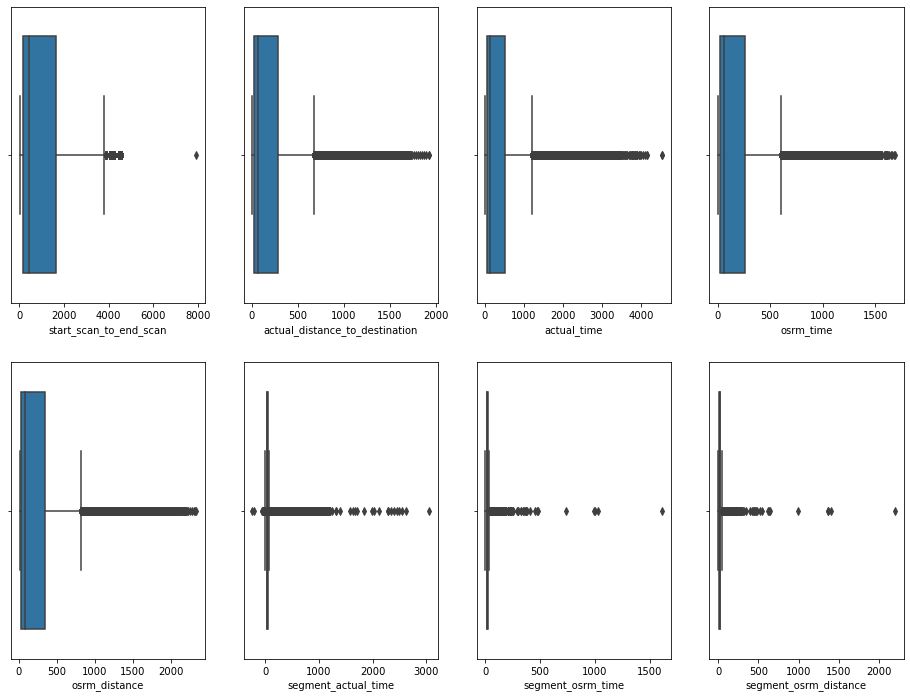

In [14]:
num_cols=[]
for i in df.columns:
    if df[i].dtype=='float64' and i not in ['factor','segment_factor']:
        num_cols.append(i)
fig,axis=plt.subplots(nrows=2,ncols=4,figsize=(16,12))
index=0
for row in range(2):
    for col in range(4):
        sns.boxplot(data=df,x=df[num_cols[index]],ax=axis[row,col])
        index+=1
plt.show()

### 1.5 Insights based on EDA

### 1. The dataset has 144867 rows and 24 columns
### 2. 12 columns are of object data type, 10 of float data type, 1 each of int and bool datatype
### 3. The column with details of datetime is of object datatype and needs to be converted to datetime type. 
### 4. source_name and destination_name columns have some missing values
### 5. The dataset covers the features of 14817 unique trip ids.
### 6. The statistical analysis gives the following insights
###     6.1 There are outliers in most of the numeric columns
### 7. Majority of the data belong to training type.
### 8. Carting route_type has more delivery orders than FTL type
### 9. The actual time taken for deliveries seems to be higher in comparison to the osrm time calculated

### 2.Merging of rows and aggregation of fields

In [15]:
# Aggregating columns based on trip_uuid, source ID and destination ID
trip_dict={
    'data':'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid': 'first',
    'route_type' : 'first',
    'source_name' : 'first',
    'destination_name' : 'first',
    'od_start_time' : 'first',
    'od_end_time' : 'last',
    'start_scan_to_end_scan' : 'first',
    'is_cutoff' : 'first',
    'cutoff_factor' : 'first',
    'cutoff_timestamp' : 'first',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'last',
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    'factor' : 'mean',
    'segment_actual_time' :'sum',
    'segment_osrm_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_factor' : 'mean'}
df_new=df.groupby(['trip_uuid','source_center','destination_center']).agg(trip_dict)
df_new.sort_values(by='od_start_time',inplace=True)
df_new.reset_index(inplace=True)
df_new.head()

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,2018-09-12 14:56:29,5082.046634,830.0,388.0,544.8027,2.150702,820.0,474.0,649.8528,2.134213
1,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,...,2018-09-12 01:39:28,186.897974,96.0,42.0,56.9116,1.875977,95.0,39.0,55.9899,2.912963
2,trip-153671043369099517,IND562132AAA,IND000000ACB,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,...,2018-09-14 00:30:34,66437.911988,2736.0,1528.0,2072.8556,1.698287,2700.0,1710.0,2227.5270,1.714563
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,2018-09-12 01:13:56,28.529648,59.0,15.0,19.6800,3.244444,59.0,16.0,19.8766,3.849206
4,trip-153671052974046625,IND583101AAA,IND583201AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,...,2018-09-12 01:47:26,126.281660,147.0,46.0,63.6461,2.751492,147.0,45.0,63.6461,3.420752


In [16]:
# Aggregating columns based on trip_uuid
trip_dict={
    'data':'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid': 'first',
    'route_type' : 'first',
    'source_center' :'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'od_start_time' : 'min',
    'od_end_time' : 'max',
    'start_scan_to_end_scan' : 'sum',
    'is_cutoff' : 'first',
    'cutoff_factor' : 'first',
    'cutoff_timestamp' : 'first',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    'factor' : 'mean',
    'segment_actual_time' :'sum',
    'segment_osrm_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_factor' : 'mean'}
df_agg=df_new.groupby('trip_uuid').agg(trip_dict)
df_agg.reset_index(inplace=True)
df_agg.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,...,2018-09-12 14:56:29,8860.812105,1562.0,717.0,991.3523,1.946333,1548.0,1008.0,1320.4733,2.013610
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,...,2018-09-12 01:39:28,240.208306,143.0,68.0,85.1110,1.811200,141.0,65.0,84.1894,2.354365
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,...,2018-09-14 00:30:34,68163.502238,3347.0,1740.0,2354.0665,1.718093,3308.0,1941.0,2545.2678,2.020570
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,2018-09-12 01:13:56,28.529648,59.0,15.0,19.6800,3.244444,59.0,16.0,19.8766,3.849206
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,...,2018-09-12 01:47:26,239.007304,341.0,117.0,146.7918,2.544328,340.0,115.0,146.7919,3.355391


### 2. Feature Creation

In [17]:
# Extracting state from source_name column
df_agg[['Others','States']]=df_agg['source_name'].str.split('(',expand=True)
df_agg[['source_state','None']]=df_agg['States'].str.split(')',expand=True)
df_agg.drop(['States','None'],axis=1,inplace=True)

In [18]:
df_agg.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,Others,source_state
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,...,1562.0,717.0,991.3523,1.946333,1548.0,1008.0,1320.4733,2.013610,Bhopal_Trnsport_H,Madhya Pradesh
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,...,143.0,68.0,85.1110,1.811200,141.0,65.0,84.1894,2.354365,Tumkur_Veersagr_I,Karnataka
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,...,3347.0,1740.0,2354.0665,1.718093,3308.0,1941.0,2545.2678,2.020570,Bangalore_Nelmngla_H,Karnataka
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,59.0,15.0,19.6800,3.244444,59.0,16.0,19.8766,3.849206,Mumbai Hub,Maharashtra
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,...,341.0,117.0,146.7918,2.544328,340.0,115.0,146.7919,3.355391,Bellary_Dc,Karnataka


In [19]:
# Extracting city from others column
df_agg[['source_city','source_city_code']]=df_agg['Others'].str.split('_',n=1,expand=True)
df_agg.drop('Others',axis=1,inplace=True)
df_agg.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_state,source_city,source_city_code
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,...,717.0,991.3523,1.946333,1548.0,1008.0,1320.4733,2.013610,Madhya Pradesh,Bhopal,Trnsport_H
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,...,68.0,85.1110,1.811200,141.0,65.0,84.1894,2.354365,Karnataka,Tumkur,Veersagr_I
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,...,1740.0,2354.0665,1.718093,3308.0,1941.0,2545.2678,2.020570,Karnataka,Bangalore,Nelmngla_H
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,15.0,19.6800,3.244444,59.0,16.0,19.8766,3.849206,Maharashtra,Mumbai Hub,None
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,...,117.0,146.7918,2.544328,340.0,115.0,146.7919,3.355391,Karnataka,Bellary,Dc


In [20]:
# Extracting place and code from others column
df_agg[['source_place','source_place_code']]=df_agg['source_city_code'].str.split('_',n=1,expand=True)
df_agg.drop('source_city_code',axis=1,inplace=True)
df_agg.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_state,source_city,source_place,source_place_code
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,...,991.3523,1.946333,1548.0,1008.0,1320.4733,2.013610,Madhya Pradesh,Bhopal,Trnsport,H
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,...,85.1110,1.811200,141.0,65.0,84.1894,2.354365,Karnataka,Tumkur,Veersagr,I
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,...,2354.0665,1.718093,3308.0,1941.0,2545.2678,2.020570,Karnataka,Bangalore,Nelmngla,H
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,19.6800,3.244444,59.0,16.0,19.8766,3.849206,Maharashtra,Mumbai Hub,None,None
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,...,146.7918,2.544328,340.0,115.0,146.7919,3.355391,Karnataka,Bellary,Dc,None


In [21]:
# Extracting state from destination_name column
df_agg[['Others','States']]=df_agg['destination_name'].str.split('(',expand=True)
df_agg[['destination_state','None']]=df_agg['States'].str.split(')',expand=True)
df_agg.drop(['States','None'],axis=1,inplace=True)

In [22]:
# Extracting city from others column
df_agg[['destination_city','Code']]=df_agg['Others'].str.split('_',n=1,expand=True)
df_agg.drop('Others',axis=1,inplace=True)
df_agg.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,source_state,source_city,source_place,source_place_code,destination_state,destination_city,Code
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,...,1008.0,1320.4733,2.013610,Madhya Pradesh,Bhopal,Trnsport,H,Haryana,Gurgaon,Bilaspur_HB
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,...,65.0,84.1894,2.354365,Karnataka,Tumkur,Veersagr,I,Karnataka,Chikblapur,ShntiSgr_D
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,...,1941.0,2545.2678,2.020570,Karnataka,Bangalore,Nelmngla,H,Punjab,Chandigarh,Mehmdpur_H
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,16.0,19.8766,3.849206,Maharashtra,Mumbai Hub,None,None,Maharashtra,Mumbai,MiraRd_IP
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,...,115.0,146.7919,3.355391,Karnataka,Bellary,Dc,None,Karnataka,Bellary,Dc


In [23]:
# Extracting place and code from others column
df_agg[['destination_place','destination_place_code']]=df_agg['Code'].str.split('_',n=1,expand=True)
df_agg.drop('Code',axis=1,inplace=True)
df_agg.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_distance,segment_factor,source_state,source_city,source_place,source_place_code,destination_state,destination_city,destination_place,destination_place_code
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,...,1320.4733,2.013610,Madhya Pradesh,Bhopal,Trnsport,H,Haryana,Gurgaon,Bilaspur,HB
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,...,84.1894,2.354365,Karnataka,Tumkur,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,D
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,...,2545.2678,2.020570,Karnataka,Bangalore,Nelmngla,H,Punjab,Chandigarh,Mehmdpur,H
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,19.8766,3.849206,Maharashtra,Mumbai Hub,None,None,Maharashtra,Mumbai,MiraRd,IP
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,...,146.7919,3.355391,Karnataka,Bellary,Dc,None,Karnataka,Bellary,Dc,None


In [24]:
# Extracting year,month, date and day from trip_creation_time
df_agg['year']=df_agg['trip_creation_time'].dt.year
df_agg['month']=df_agg['trip_creation_time'].dt.month_name()
df_agg['day']=df_agg['trip_creation_time'].dt.day
df_agg['day_name']=df_agg['trip_creation_time'].dt.day_name()
df_agg.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,source_place,source_place_code,destination_state,destination_city,destination_place,destination_place_code,year,month,day,day_name
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,...,Trnsport,H,Haryana,Gurgaon,Bilaspur,HB,2018,September,12,Wednesday
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,...,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,D,2018,September,12,Wednesday
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,...,Nelmngla,H,Punjab,Chandigarh,Mehmdpur,H,2018,September,12,Wednesday
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,None,None,Maharashtra,Mumbai,MiraRd,IP,2018,September,12,Wednesday
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,...,Dc,None,Karnataka,Bellary,Dc,None,2018,September,12,Wednesday


### 4. Comparison and Visualization of time and distance fields

In [25]:
# Creating a feature with the time taken between od_start_time and od_end_time in minutes
df_agg['total_time']=df_agg['od_end_time']-df_agg['od_start_time']
df_agg['total_time']=df_agg['total_time'].astype('timedelta64[m]')
df_agg.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,source_place_code,destination_state,destination_city,destination_place,destination_place_code,year,month,day,day_name,total_time
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,...,H,Haryana,Gurgaon,Bilaspur,HB,2018,September,12,Wednesday,2260.0
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,...,I,Karnataka,Chikblapur,ShntiSgr,D,2018,September,12,Wednesday,181.0
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,...,H,Punjab,Chandigarh,Mehmdpur,H,2018,September,12,Wednesday,3934.0
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,None,Maharashtra,Mumbai,MiraRd,IP,2018,September,12,Wednesday,100.0
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,...,None,Karnataka,Bellary,Dc,None,2018,September,12,Wednesday,718.0


In [26]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  object        
 2   trip_creation_time              14817 non-null  datetime64[ns]
 3   route_schedule_uuid             14817 non-null  object        
 4   route_type                      14817 non-null  object        
 5   source_center                   14817 non-null  object        
 6   source_name                     14807 non-null  object        
 7   destination_center              14817 non-null  object        
 8   destination_name                14809 non-null  object        
 9   od_start_time                   14817 non-null  datetime64[ns]
 10  od_end_time                     14817 non-null  datetime64[ns]
 11  st

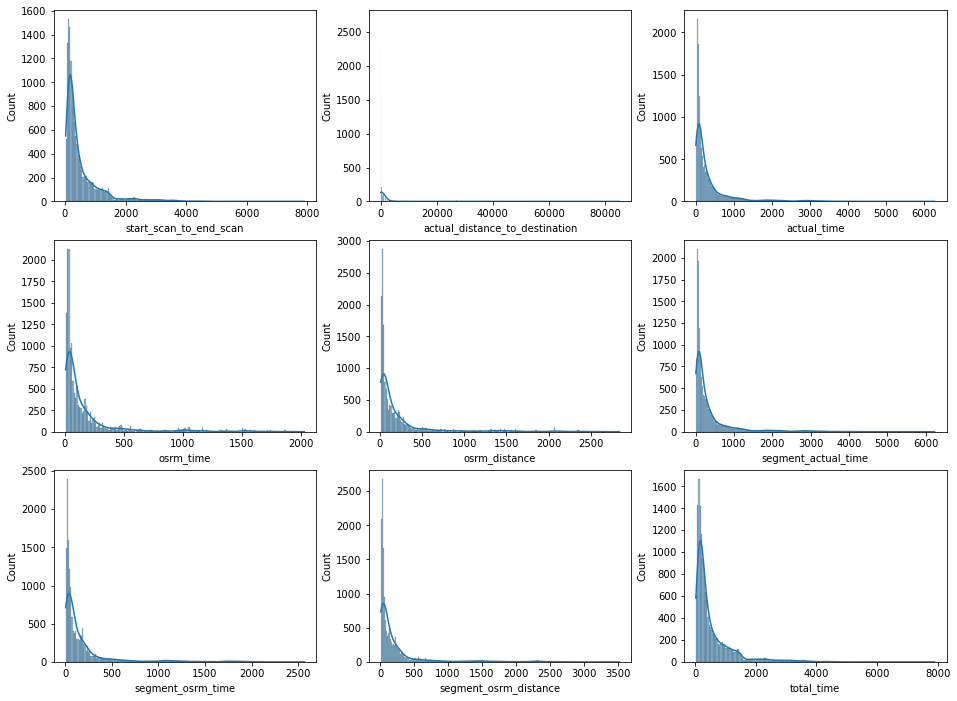

In [27]:
num_cols=[]
for i in df_agg.columns:
    if df_agg[i].dtype=='float64' and i not in ['factor','segment_factor']:
        num_cols.append(i)
fig,axis=plt.subplots(nrows=3,ncols=3,figsize=(16,12))
index=0
for row in range(3):
    for col in range(3):
        sns.histplot(data=df_agg,x=df_agg[num_cols[index]],ax=axis[row,col],kde=True)
        index+=1
plt.show()

### 5. Missing values Treatment and Outlier treatment

In [28]:
# Identify % of missing values
df_agg.isnull().sum()/len(df_agg)*100

trip_uuid                          0.000000
data                               0.000000
trip_creation_time                 0.000000
route_schedule_uuid                0.000000
route_type                         0.000000
source_center                      0.000000
source_name                        0.067490
destination_center                 0.000000
destination_name                   0.053992
od_start_time                      0.000000
od_end_time                        0.000000
start_scan_to_end_scan             0.000000
is_cutoff                          0.000000
cutoff_factor                      0.000000
cutoff_timestamp                   0.000000
actual_distance_to_destination     0.000000
actual_time                        0.000000
osrm_time                          0.000000
osrm_distance                      0.000000
factor                             0.000000
segment_actual_time                0.000000
segment_osrm_time                  0.000000
segment_osrm_distance           

### 10 columns have missing values with source_place_code and destination_place_code having a significant amount
### Since the values in the other columns are valuable for further analysis, the null values can be replaced by 'not known'

In [29]:
# Replacing missing values with 'not known'
df_agg.fillna('Not Known', inplace=True)

# Checking number of missing values
sum(df_agg.isnull().sum())

0

In [30]:
df_agg.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,year,day,total_time
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.0,14817.000000,14817.000000
mean,530.810016,15.184315,2288.554169,357.143754,161.384018,204.344689,2.434336,353.892286,180.949787,223.201161,2.630998,2018.0,18.370790,546.974759
std,658.705957,24.596761,8798.110164,561.396157,271.360995,370.395573,1.872130,556.247965,314.542047,416.628374,3.399821,0.0,7.893275,668.687710
min,23.000000,9.000000,9.002461,9.000000,6.000000,9.072900,0.610398,9.000000,6.000000,9.072900,-0.092105,2018.0,1.000000,23.000000
25%,149.000000,9.000000,49.597866,67.000000,29.000000,30.819200,1.644608,66.000000,31.000000,32.654500,1.594678,2018.0,14.000000,151.000000
50%,280.000000,9.000000,134.059655,149.000000,60.000000,65.618800,1.994536,147.000000,65.000000,70.154400,1.989680,2018.0,19.000000,288.000000
75%,637.000000,22.000000,463.956888,370.000000,168.000000,208.475000,2.580882,367.000000,185.000000,218.802400,2.636810,2018.0,25.000000,673.000000
max,7898.000000,1722.000000,85110.885093,6265.000000,2032.000000,2840.081000,70.000000,6230.000000,2564.000000,3523.632400,125.247764,2018.0,30.000000,7898.000000


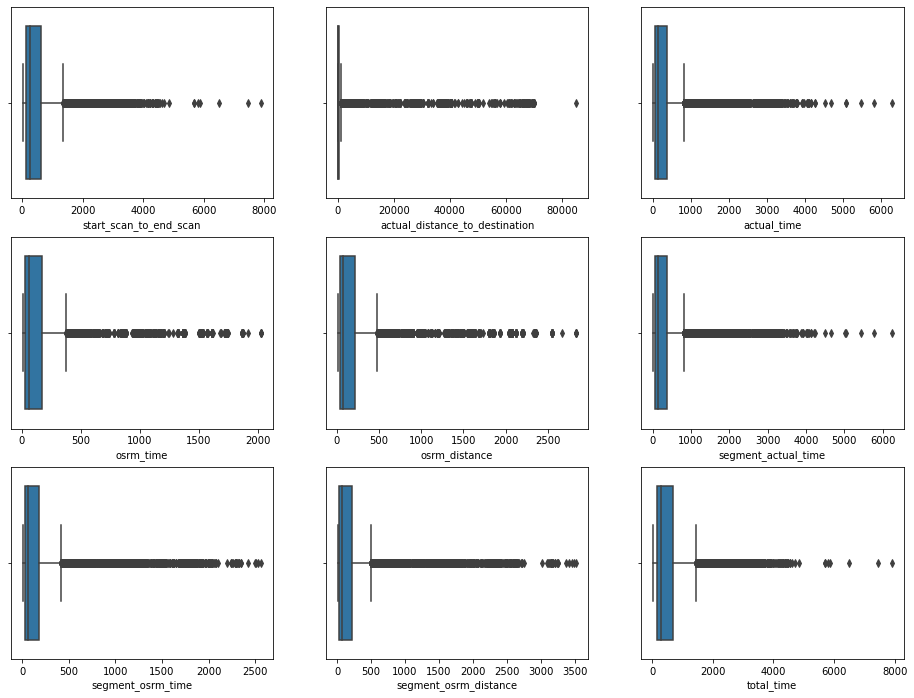

In [31]:
# Checking for outlier values in all columns with float values
num_cols=[]
for i in df_agg.columns:
    if df_agg[i].dtype=='float64' and i not in ['factor','segment_factor']:
        num_cols.append(i)
fig,axis=plt.subplots(nrows=3,ncols=3,figsize=(16,12))
index=0
for row in range(3):
    for col in range(3):
        sns.boxplot(data=df_agg,x=df_agg[num_cols[index]],ax=axis[row,col])
        index+=1
plt.show()

In [32]:
# Extracting all the columns with outlier values
df_outlier=df_agg.loc[:,num_cols]
df_outlier.index=df_agg['trip_uuid']
df_outlier.reset_index(inplace=True)
df_outlier

,trip_uuid,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,total_time
0,trip-153671041653548748,2259.0,8860.812105,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,2260.0
1,trip-153671042288605164,180.0,240.208306,143.0,68.0,85.1110,141.0,65.0,84.1894,181.0
2,trip-153671043369099517,3933.0,68163.502238,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,3934.0
3,trip-153671046011330457,100.0,28.529648,59.0,15.0,19.6800,59.0,16.0,19.8766,100.0
4,trip-153671052974046625,717.0,239.007304,341.0,117.0,146.7918,340.0,115.0,146.7919,718.0
...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,257.0,141.057373,83.0,62.0,73.4630,82.0,62.0,64.8551,405.0
14813,trip-153861104386292051,60.0,25.130640,21.0,12.0,16.0882,21.0,11.0,16.0883,60.0
14814,trip-153861106442901555,421.0,93.743842,282.0,48.0,58.9037,281.0,88.0,104.8866,422.0
14815,trip-153861115439069069,347.0,355.281673,264.0,179.0,171.1103,258.0,221.0,223.5324,348.0


In [33]:
# Removing all outlier values using IQR method
q1=df_outlier.quantile(0.25)
q3=df_outlier.quantile(0.75)
IQR=q3-q1
df_new=df_outlier[~((df_outlier<(q1-1.5*IQR)) | (df_outlier>(q3+1.5*IQR))).any(axis=1)]
df_new.reset_index(inplace=True,drop=True)
df_new

C:\Users\91907\AppData\Local\Temp\ipykernel_50884\589763940.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_new=df_outlier[~((df_outlier<(q1-1.5*IQR)) | (df_outlier>(q3+1.5*IQR))).any(axis=1)]


,trip_uuid,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,total_time
0,trip-153671042288605164,180.0,240.208306,143.0,68.0,85.1110,141.0,65.0,84.1894,181.0
1,trip-153671046011330457,100.0,28.529648,59.0,15.0,19.6800,59.0,16.0,19.8766,100.0
2,trip-153671052974046625,717.0,239.007304,341.0,117.0,146.7918,340.0,115.0,146.7919,718.0
3,trip-153671055416136166,189.0,34.407865,61.0,23.0,28.0647,60.0,23.0,28.0647,190.0
4,trip-153671066201138152,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184,98.0
...,...,...,...,...,...,...,...,...,...,...
12284,trip-153861095625827784,257.0,141.057373,83.0,62.0,73.4630,82.0,62.0,64.8551,405.0
12285,trip-153861104386292051,60.0,25.130640,21.0,12.0,16.0882,21.0,11.0,16.0883,60.0
12286,trip-153861106442901555,421.0,93.743842,282.0,48.0,58.9037,281.0,88.0,104.8866,422.0
12287,trip-153861115439069069,347.0,355.281673,264.0,179.0,171.1103,258.0,221.0,223.5324,348.0


In [34]:
# Merging new dataset with df_agg
df_new=pd.merge(df_agg,df_new,on='trip_uuid')
df_new.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,total_time_x,start_scan_to_end_scan_y,actual_distance_to_destination_y,actual_time_y,osrm_time_y,osrm_distance_y,segment_actual_time_y,segment_osrm_time_y,segment_osrm_distance_y,total_time_y
0,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,...,181.0,180.0,240.208306,143.0,68.0,85.1110,141.0,65.0,84.1894,181.0
1,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,100.0,100.0,28.529648,59.0,15.0,19.6800,59.0,16.0,19.8766,100.0
2,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,...,718.0,717.0,239.007304,341.0,117.0,146.7918,340.0,115.0,146.7919,718.0
3,trip-153671055416136166,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 00:02:34.161600,...,190.0,189.0,34.407865,61.0,23.0,28.0647,60.0,23.0,28.0647,190.0
4,trip-153671066201138152,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,...,98.0,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184,98.0


In [35]:
# Removing duplicate columns
df_final=df_new.iloc[:,:34]
df_final['total_time']=df_new['total_time_y']
df_final.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,source_city,source_place,source_place_code,destination_state,destination_city,destination_place,destination_place_code,year,month,total_time
0,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,...,Tumkur,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,D,2018,September,181.0
1,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,Mumbai Hub,Not Known,Not Known,Maharashtra,Mumbai,MiraRd,IP,2018,September,100.0
2,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,...,Bellary,Dc,Not Known,Karnataka,Bellary,Dc,Not Known,2018,September,718.0
3,trip-153671055416136166,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 00:02:34.161600,...,Chennai,Porur,DPC,Tamil Nadu,Chennai,Sriperumbudur,Dc,2018,September,190.0
4,trip-153671066201138152,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,...,Chennai,Chrompet,DPC,Tamil Nadu,Chennai,Vandalur,Dc,2018,September,98.0


In [36]:
# Final statisical analysis
df_final.describe()

,start_scan_to_end_scan_x,cutoff_factor,actual_distance_to_destination_x,actual_time_x,osrm_time_x,osrm_distance_x,factor,segment_actual_time_x,segment_osrm_time_x,segment_osrm_distance_x,segment_factor,year,total_time
count,12289.000000,12289.000000,12289.000000,12289.000000,12289.000000,12289.000000,12289.000000,12289.000000,12289.000000,12289.000000,12289.000000,12289.0,12289.000000
mean,306.663520,13.191553,190.963585,167.211002,73.183497,84.573551,2.410137,165.683864,80.318415,90.378495,2.598669,2018.0,320.681667
std,245.543564,7.735154,219.215545,149.064130,66.797315,81.181865,1.695233,148.179103,73.836627,85.933087,3.191477,0.0,265.658915
min,23.000000,9.000000,9.002461,9.000000,6.000000,9.072900,0.610398,9.000000,6.000000,9.072900,-0.092105,2018.0,23.000000
25%,133.000000,9.000000,47.290203,60.000000,26.000000,27.876600,1.623379,59.000000,27.000000,29.007500,1.553613,2018.0,135.000000
50%,225.000000,9.000000,91.060650,109.000000,47.000000,46.044600,2.010941,108.000000,51.000000,52.148800,2.008013,2018.0,230.000000
75%,396.000000,22.000000,258.541514,233.000000,99.000000,121.741500,2.637427,231.000000,115.000000,131.313100,2.691667,2018.0,410.000000
max,1366.000000,220.000000,1083.586156,820.000000,376.000000,431.480000,70.000000,818.000000,407.000000,472.921900,125.247764,2018.0,1454.000000


### 6. Checking relationship between aggregated fields

### 6.1 Compare the difference between total_time and start_scan_to_end_scan

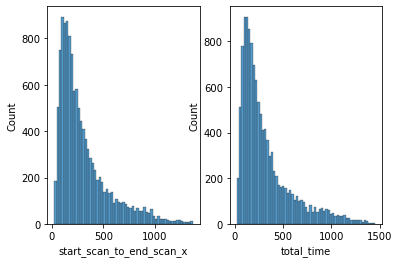

In [37]:
plt.subplot(1,2,1)
sns.histplot(df_final['start_scan_to_end_scan_x'])

plt.subplot(1,2,2)
sns.histplot(df_final['total_time'])
plt.show()

### The visual analysis shows that the total time taken vs the time expected to taken from start to end is almost the same.

#### Hypothesis Formulation
#### H0 : There is no difference between the means of start_scan_to_end_scan and total_time columns 
#### Ha : The mean of total_time column is significantly greater than start_scan_to_end_scan column

#### Since we are comparing the means of 2 different samples, we will be using 2 sample T Test

####  Check Test assumptions
####   1. Data values are independent - True for both samples
####   2. Data is obtained from a random sample in the population - True for both samples
####   3. Data values are continous - Both samples have continous values
####   4. Data is normally distributed - Since number of values>5000, shapiro wilk test cannot be used. From the visual analysis, an approximate normality can be inferred

In [38]:
# 5. Checking if variances of 2 groups are equal using Levene's test
# H0 : Variances of 2 groups are equal
# H1 : Variances of 2 groups are not equal
lev_stat,p_value=levene(df_final['total_time'],df_final['start_scan_to_end_scan_x'])
print(p_value)
# Since p_value is low, we reject the null hypothesis and variances of the 2 groups are not equal

1.2178744655270949e-06


In [39]:
t_stat,p_value=ttest_ind(df_final['total_time'],df_final['start_scan_to_end_scan_x'],alternative='greater')
print(p_value)

8.740172871165744e-06


In [40]:
# Interpreting the p-value at 95% significance
alpha=0.05
if p_value <alpha:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')

Reject Null Hypothesis


### Based on the 2 sample T-Test, we reject the null hypothesis. So we can confirm that the actual time taken to deliver is greater than the time calculated between source and destination

### 6.2 Compare the difference between actual_time and osrm_time

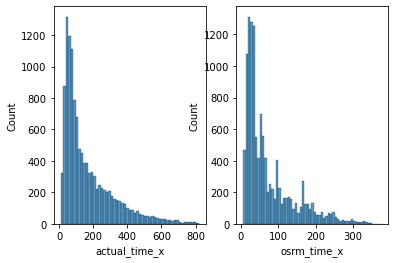

In [41]:
plt.subplot(1,2,1)
sns.histplot(df_final['actual_time_x'])

plt.subplot(1,2,2)
sns.histplot(df_final['osrm_time_x'])
plt.show()

### The visual analysis shows that the actual time taken for deliveries is much greater than the time calculated by osrm 

#### Hypothesis Formulation
#### H0 : There is no difference between the means of actual_time and osrm_time columns 
#### Ha : The mean of actual_time column is significantly greater than osrm_time column

#### Since we are comparing the means of 2 different samples, we will be using 2 sample T Test

####  Check Test assumptions
####   1. Data values are independent - True for both samples
####   2. Data is obtained from a random sample in the population - True for both samples
####   3. Data values are continous - Both samples have continous values
####   4. Data is normally distributed - Since number of values>5000, shapiro wilk test cannot be used. From the visual analysis, an approximate normality can be inferred

In [42]:
# 5. Checking if variances of 2 groups are equal using Levene's test
# H0 : Variances of 2 groups are equal
# H1 : Variances of 2 groups are not equal
lev_stat,p_value=levene(df_final['actual_time_x'],df_final['osrm_time_x'])
print(p_value)
# Since p_value is low, we reject the null hypothesis and variances of the 2 groups are not equal

0.0


In [43]:
t_stat,p_value=ttest_ind(df_final['actual_time_x'],df_final['osrm_time_x'],alternative='greater')
print(p_value)

0.0


In [44]:
# Interpreting the p-value at 95% significance
alpha=0.05
if p_value <alpha:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')

Reject Null Hypothesis


### Based on the 2 sample T-Test, we reject the null hypothesis. So we can confirm that the actual time taken to deliver is greater than the time calculated by osmr

### 6.3 Compare the difference between actual_time and segment_actual_time

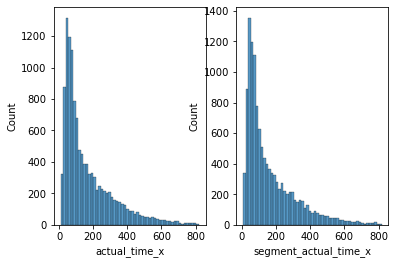

In [45]:
plt.subplot(1,2,1)
sns.histplot(df_final['actual_time_x'])

plt.subplot(1,2,2)
sns.histplot(df_final['segment_actual_time_x'])
plt.show()

### The visual analysis shows that the actual time taken for deliveries is almost similar to the time calculated by segment

#### Hypothesis Formulation
#### H0 : There is no difference between the means of actual_time and segment_actual_time columns 
#### Ha : The mean of actual_time column is significantly greater than segment_actual_time column

#### Since we are comparing the means of 2 different samples, we will be using 2 sample T Test

####  Check Test assumptions
####   1. Data values are independent - True for both samples
####   2. Data is obtained from a random sample in the population - True for both samples
####   3. Data values are continous - Both samples have continous values
####   4. Data is normally distributed - Since number of values>5000, shapiro wilk test cannot be used. From the visual analysis, an approximate normality can be inferred

In [46]:
# 5. Checking if variances of 2 groups are equal using Levene's test
# H0 : Variances of 2 groups are equal
# H1 : Variances of 2 groups are not equal
lev_stat,p_value=levene(df_final['actual_time_x'],df_final['segment_actual_time_x'])
print(p_value)
# Since p_value is high, we accept the null hypothesis and variances of the 2 groups are equal

0.6169598187431005


In [47]:
t_stat,p_value=ttest_ind(df_final['actual_time_x'],df_final['segment_actual_time_x'],alternative='greater')
print(p_value)

0.21028440537981918


In [48]:
# Interpreting the p-value at 95% significance
alpha=0.05
if p_value <alpha:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')

Fail to reject Null Hypothesis


### Based on the 2 sample T-Test, we fail to reject the null hypothesis. So we can confirm that the calculation of actual time from the segment_actual time is correct

### 6.4 Compare the difference between osrm_distance and segment_osrm_distance

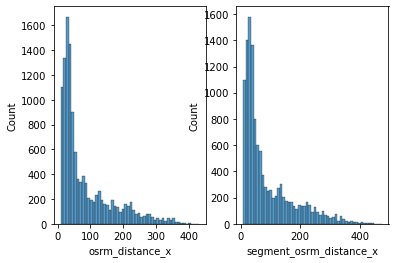

In [49]:
plt.subplot(1,2,1)
sns.histplot(df_final['osrm_distance_x'])

plt.subplot(1,2,2)
sns.histplot(df_final['segment_osrm_distance_x'])
plt.show()

### The visual analysis shows that the actual distance calculated for deliveries by osrm is almost equal to the distance calculated per segment

#### Hypothesis Formulation
#### H0 : There is no difference between the means of osrm_distance and segment_osrm_distance columns 
#### Ha : The mean of osrm_distance column is significantly lesser than segment_osrm_distance column

#### Since we are comparing the means of 2 different samples, we will be using 2 sample T Test

####  Check Test assumptions
####   1. Data values are independent - True for both samples
####   2. Data is obtained from a random sample in the population - True for both samples
####   3. Data values are continous - Both samples have continous values
####   4. Data is normally distributed - Since number of values>5000, shapiro wilk test cannot be used. From the visual analysis, an approximate normality can be inferred

In [50]:
# 5. Checking if variances of 2 groups are equal using Levene's test
# H0 : Variances of 2 groups are equal
# H1 : Variances of 2 groups are not equal
lev_stat,p_value=levene(df_final['osrm_distance_x'],df_final['segment_osrm_distance_x'])
print(p_value)
# Since p_value is low, we reject the null hypothesis and variances of the 2 groups are not equal

1.072511756560704e-05


In [51]:
t_stat,p_value=ttest_ind(df_final['osrm_distance_x'],df_final['segment_osrm_distance_x'],alternative='less')
print(p_value)

2.63675010779767e-08


In [52]:
# Interpreting the p-value at 95% significance
alpha=0.05
if p_value <alpha:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')

Reject Null Hypothesis


### Based on the 2 sample T-Test, we reject the null hypothesis. So we can confirm that the calculation of osmr distance from the segment osmr distance has some errors in it

### 6.5 Compare the difference between osrm_time and segment_osrm_time

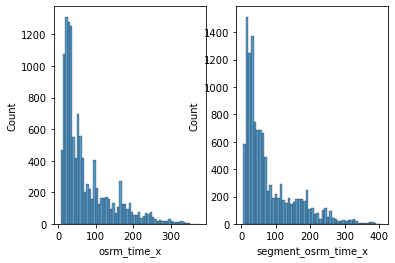

In [53]:
plt.subplot(1,2,1)
sns.histplot(df_final['osrm_time_x'])

plt.subplot(1,2,2)
sns.histplot(df_final['segment_osrm_time_x'])
plt.show()

### The visual analysis shows that the total osrm time taken for deliveries is lesser than the osrm time calculated by segment

#### Hypothesis Formulation
#### H0 : There is no difference between the means of osrm_time and segment_osrm_time columns 
#### Ha : The mean of osrm_time column is lesser than segment_osrm_time column

#### Since we are comparing the means of 2 different samples, we will be using 2 sample T Test

####  Check Test assumptions
####   1. Data values are independent - True for both samples
####   2. Data is obtained from a random sample in the population - True for both samples
####   3. Data values are continous - Both samples have continous values
####   4. Data is normally distributed - Since number of values>5000, shapiro wilk test cannot be used. From the visual analysis, an approximate normality can be inferred

In [54]:
# 5. Checking if variances of 2 groups are equal using Levene's test
# H0 : Variances of 2 groups are equal
# H1 : Variances of 2 groups are not equal
lev_stat,p_value=levene(df_final['osrm_time_x'],df_final['segment_osrm_time_x'])
print(p_value)
# Since p_value is low, we reject the null hypothesis and variances of the 2 groups are not equal

4.209455925710865e-14


In [55]:
t_stat,p_value=ttest_ind(df_final['osrm_time_x'],df_final['segment_osrm_time_x'],alternative='less')
print(p_value)

1.0220965779751199e-15


In [56]:
# Interpreting the p-value at 95% significance
alpha=0.05
if p_value <alpha:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')

Reject Null Hypothesis


### Based on the 2 sample T-Test, we reject the null hypothesis. So we can confirm that the calculation of osmr time from osmr segment time has some errors in it

### 7. Handling categorical values

In [57]:
# Identify columns with categorical variables
df_final.nunique().sort_values()

year                                    1
data                                    2
route_type                              2
month                                   2
is_cutoff                               2
source_state                           29
destination_state                      33
source_place_code                      45
destination_place_code                 48
cutoff_factor                          56
osrm_time_x                           336
segment_osrm_time_x                   369
source_place                          617
source_city                           654
destination_place                     701
segment_actual_time_x                 726
actual_time_x                         732
destination_city                      753
source_name                           830
source_center                         830
destination_name                      920
destination_center                    923
start_scan_to_end_scan_x             1136
total_time                        

In [58]:
# data and route type are relevant categorical variables
cols=['data','route_type']

# One Hot Encoding of categorical variables using get_dummies 
df_enc=pd.get_dummies(df_final,columns=['data','route_type'])
df_enc.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan_x,...,destination_city,destination_place,destination_place_code,year,month,total_time,data_test,data_training,route_type_Carting,route_type_FTL
0,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,...,Chikblapur,ShntiSgr,D,2018,September,181.0,0,1,1,0
1,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,...,Mumbai,MiraRd,IP,2018,September,100.0,0,1,1,0
2,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,...,Bellary,Dc,Not Known,2018,September,718.0,0,1,0,1
3,trip-153671055416136166,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,189.0,...,Chennai,Sriperumbudur,Dc,2018,September,190.0,0,1,1,0
4,trip-153671066201138152,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,98.0,...,Chennai,Vandalur,Dc,2018,September,98.0,0,1,1,0


### 8. Column Normalization /Column Standardization

In [59]:
df_enc.describe()

,start_scan_to_end_scan_x,cutoff_factor,actual_distance_to_destination_x,actual_time_x,osrm_time_x,osrm_distance_x,factor,segment_actual_time_x,segment_osrm_time_x,segment_osrm_distance_x,segment_factor,year,total_time,data_test,data_training,route_type_Carting,route_type_FTL
count,12289.000000,12289.000000,12289.000000,12289.000000,12289.000000,12289.000000,12289.000000,12289.000000,12289.000000,12289.000000,12289.000000,12289.0,12289.000000,12289.000000,12289.000000,12289.000000,12289.000000
mean,306.663520,13.191553,190.963585,167.211002,73.183497,84.573551,2.410137,165.683864,80.318415,90.378495,2.598669,2018.0,320.681667,0.288307,0.711693,0.710636,0.289364
std,245.543564,7.735154,219.215545,149.064130,66.797315,81.181865,1.695233,148.179103,73.836627,85.933087,3.191477,0.0,265.658915,0.452993,0.452993,0.453486,0.453486
min,23.000000,9.000000,9.002461,9.000000,6.000000,9.072900,0.610398,9.000000,6.000000,9.072900,-0.092105,2018.0,23.000000,0.000000,0.000000,0.000000,0.000000
25%,133.000000,9.000000,47.290203,60.000000,26.000000,27.876600,1.623379,59.000000,27.000000,29.007500,1.553613,2018.0,135.000000,0.000000,0.000000,0.000000,0.000000
50%,225.000000,9.000000,91.060650,109.000000,47.000000,46.044600,2.010941,108.000000,51.000000,52.148800,2.008013,2018.0,230.000000,0.000000,1.000000,1.000000,0.000000
75%,396.000000,22.000000,258.541514,233.000000,99.000000,121.741500,2.637427,231.000000,115.000000,131.313100,2.691667,2018.0,410.000000,1.000000,1.000000,1.000000,1.000000
max,1366.000000,220.000000,1083.586156,820.000000,376.000000,431.480000,70.000000,818.000000,407.000000,472.921900,125.247764,2018.0,1454.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
# Since most numeric columns have a fairly normal distribution and is spread along different ranges,
# Column standardization can be considered
cols=['start_scan_to_end_scan_x','actual_distance_to_destination_x','actual_time_x','osrm_time_x','osrm_distance_x',
      'segment_actual_time_x','segment_osrm_time_x','segment_osrm_distance_x','total_time']
data=df_enc.loc[:,cols]
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data),columns=cols)
data_scaled['trip_uuid']=df_enc['trip_uuid']
data_scaled

,start_scan_to_end_scan_x,actual_distance_to_destination_x,actual_time_x,osrm_time_x,osrm_distance_x,segment_actual_time_x,segment_osrm_time_x,segment_osrm_distance_x,total_time,trip_uuid
0,-0.515870,0.224650,-0.162427,-0.077604,0.006621,-0.166588,-0.207472,-0.072025,-0.525815,trip-153671042288605164
1,-0.841691,-0.741008,-0.725965,-0.871081,-0.799393,-0.719995,-0.871126,-0.820461,-0.830729,trip-153671046011330457
2,1.671203,0.219171,1.165915,0.655989,0.766437,1.176436,0.469726,0.656507,1.495657,trip-153671052974046625
3,-0.479216,-0.714192,-0.712548,-0.751311,-0.696106,-0.713246,-0.776319,-0.725173,-0.491935,trip-153671055416136166
4,-0.849837,-0.829642,-0.960773,-0.901023,-0.893772,-0.956205,-0.911758,-0.911910,-0.838258,trip-153671066201138152
...,...,...,...,...,...,...,...,...,...,...
12284,-0.202268,-0.227667,-0.564954,-0.167431,-0.136866,-0.564771,-0.248104,-0.297027,0.317406,trip-153861095625827784
12285,-1.004602,-0.756514,-0.980900,-0.915995,-0.843638,-0.976452,-0.938846,-0.864547,-0.981304,trip-153861104386292051
12286,0.465665,-0.443507,0.770096,-0.377029,-0.316215,0.778253,0.104039,0.168837,0.381401,trip-153861106442901555
12287,0.164281,0.749604,0.649338,1.584208,1.066005,0.623029,1.905386,1.549570,0.102837,trip-153861115439069069


In [61]:
# Merging standardized columns with original dataset
df_enc.drop(columns=cols,inplace=True)
df_std=pd.merge(df_enc,data_scaled,on='trip_uuid')
df_std

,trip_uuid,trip_creation_time,route_schedule_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,is_cutoff,...,route_type_FTL,start_scan_to_end_scan_x,actual_distance_to_destination_x,actual_time_x,osrm_time_x,osrm_distance_x,segment_actual_time_x,segment_osrm_time_x,segment_osrm_distance_x,total_time
0,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,True,...,0,-0.515870,0.224650,-0.162427,-0.077604,0.006621,-0.166588,-0.207472,-0.072025,-0.525815
1,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,True,...,0,-0.841691,-0.741008,-0.725965,-0.871081,-0.799393,-0.719995,-0.871126,-0.820461,-0.830729
2,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,True,...,1,1.671203,0.219171,1.165915,0.655989,0.766437,1.176436,0.469726,0.656507,1.495657
3,trip-153671055416136166,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,False,...,0,-0.479216,-0.714192,-0.712548,-0.751311,-0.696106,-0.713246,-0.776319,-0.725173,-0.491935
4,trip-153671066201138152,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,True,...,0,-0.849837,-0.829642,-0.960773,-0.901023,-0.893772,-0.956205,-0.911758,-0.911910,-0.838258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12284,trip-153861095625827784,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,True,...,0,-0.202268,-0.227667,-0.564954,-0.167431,-0.136866,-0.564771,-0.248104,-0.297027,0.317406
12285,trip-153861104386292051,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,True,...,0,-1.004602,-0.756514,-0.980900,-0.915995,-0.843638,-0.976452,-0.938846,-0.864547,-0.981304
12286,trip-153861106442901555,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,True,...,0,0.465665,-0.443507,0.770096,-0.377029,-0.316215,0.778253,0.104039,0.168837,0.381401
12287,trip-153861115439069069,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,True,...,0,0.164281,0.749604,0.649338,1.584208,1.066005,0.623029,1.905386,1.549570,0.102837


In [62]:
df_std.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,is_cutoff,...,route_type_FTL,start_scan_to_end_scan_x,actual_distance_to_destination_x,actual_time_x,osrm_time_x,osrm_distance_x,segment_actual_time_x,segment_osrm_time_x,segment_osrm_distance_x,total_time
0,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,True,...,0,-0.515870,0.224650,-0.162427,-0.077604,0.006621,-0.166588,-0.207472,-0.072025,-0.525815
1,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,True,...,0,-0.841691,-0.741008,-0.725965,-0.871081,-0.799393,-0.719995,-0.871126,-0.820461,-0.830729
2,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,True,...,1,1.671203,0.219171,1.165915,0.655989,0.766437,1.176436,0.469726,0.656507,1.495657
3,trip-153671055416136166,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,False,...,0,-0.479216,-0.714192,-0.712548,-0.751311,-0.696106,-0.713246,-0.776319,-0.725173,-0.491935
4,trip-153671066201138152,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,True,...,0,-0.849837,-0.829642,-0.960773,-0.901023,-0.893772,-0.956205,-0.911758,-0.911910,-0.838258


### 9. Additional Analysis for Business Insights

In [63]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12289 entries, 0 to 12288
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   trip_uuid                         12289 non-null  object        
 1   data                              12289 non-null  object        
 2   trip_creation_time                12289 non-null  datetime64[ns]
 3   route_schedule_uuid               12289 non-null  object        
 4   route_type                        12289 non-null  object        
 5   source_center                     12289 non-null  object        
 6   source_name                       12289 non-null  object        
 7   destination_center                12289 non-null  object        
 8   destination_name                  12289 non-null  object        
 9   od_start_time                     12289 non-null  datetime64[ns]
 10  od_end_time                       12289 non-nu

In [64]:
# Finding top states where orders originate
a=df_final['source_state'].value_counts().sort_values(ascending=False)[:5]
a

Maharashtra    2238
Karnataka      2000
Haryana        1294
Tamil Nadu     1030
Telangana       657
Name: source_state, dtype: int64

<AxesSubplot:>

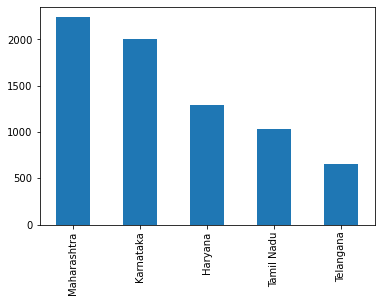

In [65]:
a.plot(kind='bar')

In [66]:
# Finding top states where orders are delivered
a=df_final['destination_state'].value_counts().sort_values(ascending=False)[:5]
a

Maharashtra    2231
Karnataka      1993
Haryana        1287
Tamil Nadu     1028
Telangana       656
Name: destination_state, dtype: int64

<AxesSubplot:>

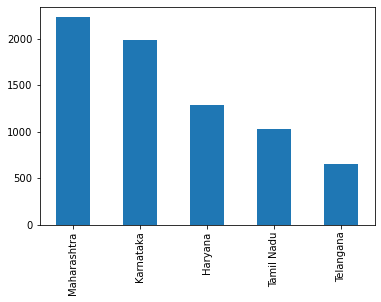

In [67]:
a.plot(kind='bar')

In [68]:
# Finding the city with most number of orders generated
a=df_final['source_city'].value_counts().sort_values(ascending=False)[:5]

<AxesSubplot:>

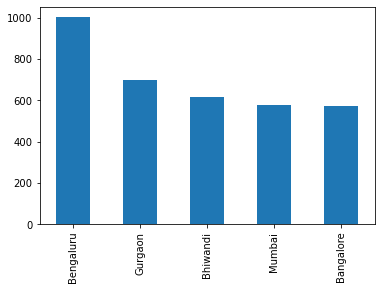

In [69]:
a.plot(kind='bar')

In [70]:
# Finding the city with most number of orders delivered
a=df_final['destination_city'].value_counts().sort_values(ascending=False)[:5]

<AxesSubplot:>

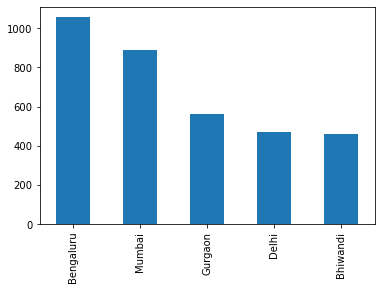

In [71]:
a.plot(kind='bar')

In [72]:
# Finding the busiest combination of source and destination states
a=df_final.groupby(['source_state','destination_state']).agg({'trip_uuid' : 'count', 'actual_distance_to_destination_x' : np.mean,
                                                            'actual_time_x' : np.mean})
a.sort_values(by='trip_uuid', ascending=False)[:5]

,,trip_uuid,actual_distance_to_destination_x,actual_time_x
source_state,destination_state,,,
Maharashtra,Maharashtra,2223,107.678744,110.420153
Karnataka,Karnataka,1946,122.960872,118.529291
Tamil Nadu,Tamil Nadu,1011,191.578693,150.366963
Haryana,Haryana,787,213.910641,146.734435
Telangana,Telangana,629,185.941263,179.201908


In [73]:
# Finding the busiest combination of source and destination cities
a=df_final.groupby(['source_city','destination_city']).agg({'trip_uuid' : 'count', 'actual_distance_to_destination_x' : np.mean,
                                                            'actual_time_x' : np.mean})
a.sort_values(by='trip_uuid', ascending=False)[:5]

,,trip_uuid,actual_distance_to_destination_x,actual_time_x
source_city,destination_city,,,
Bengaluru,Bengaluru,549,89.814254,88.089253
Bangalore,Bengaluru,455,77.478596,77.720879
Hyderabad,Hyderabad,377,149.592085,143.909814
Bhiwandi,Mumbai,332,54.694023,78.391566
Bengaluru,Bangalore,326,79.897706,92.223926


In [75]:
# States with least orders generated
a=df_final['source_state'].value_counts().sort_values()[:10]
a

Arunachal Pradesh          3
Nagaland                   4
Not Known                 10
Himachal Pradesh          12
Pondicherry               12
Jammu & Kashmir           13
Dadra and Nagar Haveli    15
Goa                       24
Chhattisgarh              42
Chandigarh                48
Name: source_state, dtype: int64

In [83]:
# Routes with maximum difference between actual time and osrm time
df_final['time_diff']=df_final['actual_time_x']-df_final['osrm_time_x']
df_final.groupby(['source_state','destination_state'])['time_diff'].mean().reset_index().sort_values(by='time_diff',ascending=False)

,source_state,destination_state,time_diff
45,Kerala,Karnataka,615.000000
9,Assam,Tripura,470.000000
50,Maharashtra,Gujarat,407.000000
35,Himachal Pradesh,Punjab,367.142857
85,Uttarakhand,Haryana,352.400000
...,...,...,...
67,Rajasthan,Madhya Pradesh,19.200000
17,Delhi,Not Known,18.000000
41,Karnataka,Kerala,16.000000
11,Chandigarh,Chandigarh,9.000000


In [84]:
# Routes with minimum difference between actual time and osrm time
df_final['time_diff']=df_final['actual_time_x']-df_final['osrm_time_x']
df_final.groupby(['source_state','destination_state'])['time_diff'].mean().reset_index().sort_values(by='time_diff')

,source_state,destination_state,time_diff
55,Not Known,Karnataka,-4.000000
11,Chandigarh,Chandigarh,9.000000
41,Karnataka,Kerala,16.000000
17,Delhi,Not Known,18.000000
67,Rajasthan,Madhya Pradesh,19.200000
...,...,...,...
85,Uttarakhand,Haryana,352.400000
35,Himachal Pradesh,Punjab,367.142857
50,Maharashtra,Gujarat,407.000000
9,Assam,Tripura,470.000000
